## Introduction

Matrix factorization is a class of collaborative filtering algorithms used in recommender systems. Matrix factorization algorithms work by decomposing the user-item interaction matrix into the product of two lower dimensionality rectangular matrices.The idea behind matrix factorization is to represent users and items in a lower dimensional latent space. For the case here, the items represent movies

Our aim is to fill in the blank rating values here. For users and movies to populate them, the weights of the latent features, that are supposed to be available, are found from the available data. Then, with these weights, an estimate is made for the empty rating values.

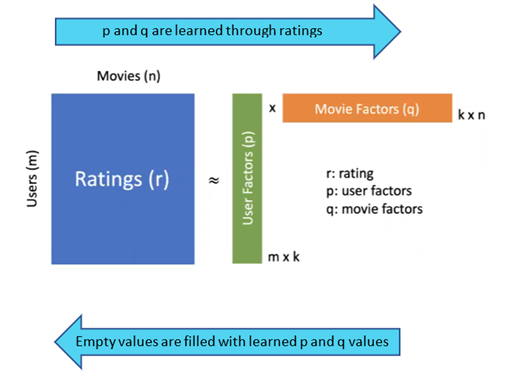

**Context**

The datasets describe ratings and free-text tagging activities from MovieLens, a movie recommendation service. It contains 20000263 ratings and 465564 tag applications across 27278 movies. These data were created by 138493 users between January 09, 1995 and March 31, 2015. This dataset was generated on October 17, 2016.

Users were selected at random for inclusion. All selected users had rated at least 20 movies.

**Business Problem**

Developing a recommendation system that gives estimated ratings for a given user and movie, based on on single value decomposition by using Surprise Library.

**Attribute Information**

The two files from the data will be used in this study as rating.csv and movie.csv

rating.csv that contains ratings of movies by users:

* userId
* movieId
* rating
* timestamp 

movie.csv that contains movie information:

* movieId
* title
* genres

**Task Details**

* **Step 1:** Preparing the Data Set

* **Step 2:** Modeling

* **Step 3:** Model Tuning

* **Step 4:** Final Model and Prediction

In [1]:
!pip install surprise
import pandas as pd
!pip install openpyxl
from surprise import Reader, SVD, Dataset, accuracy
from surprise.model_selection import GridSearchCV, train_test_split, cross_validate
pd.set_option('display.max_columns', None)

     |████████████████████████████████| 242 kB 288 kB/s            


In [2]:
movie = pd.read_csv('../input/movielens-20m-dataset/movie.csv')
rating = pd.read_csv('../input/movielens-20m-dataset/rating.csv')
df = movie.merge(rating, how="left", on="movieId")
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6.0,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10.0,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.5,2009-01-02 01:13:41


## Step 1: Preparing the Data Set

Four movies are selected for the application

In [3]:
movie_ids = [130219, 356, 4422, 541]
movies = ["The Dark Knight (2011)",
          "Cries and Whispers (Viskningar och rop) (1972)",
          "Forrest Gump (1994)",
          "Blade Runner (1982)"]


In [4]:
sample_df = df[df.movieId.isin(movie_ids)]
sample_df.shape

(97343, 6)

In [5]:
sample_df.head()

,movieId,title,genres,userId,rating,timestamp
2457839,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.0,4.0,1996-08-24 09:28:42
2457840,356,Forrest Gump (1994),Comedy|Drama|Romance|War,7.0,4.0,2002-01-16 19:02:55
2457841,356,Forrest Gump (1994),Comedy|Drama|Romance|War,8.0,5.0,1996-06-05 13:44:19
2457842,356,Forrest Gump (1994),Comedy|Drama|Romance|War,9.0,4.0,2001-07-01 20:26:38
2457843,356,Forrest Gump (1994),Comedy|Drama|Romance|War,10.0,3.0,1999-11-25 02:32:02


**Creating user_movie_df**

In [6]:
user_movie_df = sample_df.pivot_table(index=["userId"], columns=["title"], values="rating")
user_movie_df.shape

(76918, 4)

In [7]:
user_movie_df.head()

title,Blade Runner (1982),Cries and Whispers (Viskningar och rop) (1972),Forrest Gump (1994),The Dark Knight (2011)
userId,,,,
1.0,4.0,NaN,NaN,NaN
2.0,5.0,NaN,NaN,NaN
3.0,5.0,NaN,NaN,NaN
4.0,NaN,NaN,4.0,NaN
7.0,NaN,NaN,4.0,NaN


User-Item matrix is created with users in rows and movies in columns.

Here we scale the ratings to the 1-5 range with the Reader object.

In [8]:
reader = Reader(rating_scale=(1, 5))

In [9]:
data = Dataset.load_from_df(sample_df[['userId', 'movieId', 'rating']], reader)

In this library, Dataset.load is used to read data, similar to read.csv in pandas.

## Step 2: Modelling

In [10]:
trainset, testset = train_test_split(data, test_size=.25)
svd_model = SVD()
svd_model.fit(trainset)

Unknown p and q matrices were learned from the existing data. It pretends to have 100 latent factors by default

In [11]:
predictions = svd_model.test(testset)

accuracy.rmse(predictions)


RMSE: 0.9352


0.9351544643558158

We tested the learned weights with test data and found the RMSE(Root Mean Square Error ) and MAE(Mean Absolute Error) values.

Now we will apply cross validation method in order to validate th eresults.

In [12]:
cross_validate(svd_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9337  0.9288  0.9383  0.9292  0.9429  0.9346  0.0054  
MAE (testset)     0.7201  0.7129  0.7226  0.7173  0.7269  0.7200  0.0047  
Fit time          4.85    4.84    4.91    5.08    4.98    4.93    0.09    
Test time         0.15    0.13    0.13    0.13    0.13    0.13    0.01    


{'test_rmse': array([0.9336588 , 0.92876176, 0.93828045, 0.92917603, 0.94294702]),
 'test_mae': array([0.72011494, 0.71292256, 0.7226272 , 0.71727599, 0.72689611]),
 'fit_time': (4.851755619049072,
  4.84221625328064,
  4.913287401199341,
  5.0772788524627686,
  4.9833855628967285),
 'test_time': (0.15257596969604492,
  0.12862038612365723,
  0.12836241722106934,
  0.1319286823272705,
  0.13077855110168457)}

Let's try the svd_model, that we built, for user Id=1 and movie ID=541 ("Blade Runner (1982)). Let the model give us a suggestion.  

In [13]:
svd_model.predict(uid=1.0, iid=541, verbose=True)

user: 1.0        item: 541        r_ui = None   est = 4.11   {'was_impossible': False}


Prediction(uid=1.0, iid=541, r_ui=None, est=4.1059925899067755, details={'was_impossible': False})

Normally, this user didn't rate this movie but we estimated it as 4,29.

## Step 3: Model Tuning

Here GridSearchCv algorithm will be used to tune the model

In [14]:
param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005]}

gs = GridSearchCV(SVD,
                  param_grid,
                  measures=['rmse', 'mae'],
                  cv=3,
                  n_jobs=-1,
                  joblib_verbose=True)

gs.fit(data)
gs.best_score['rmse']


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   25.8s finished


0.930704295855087

It was 0.9361 before tuning.

In [15]:
gs.best_params['rmse']

{'n_epochs': 10, 'lr_all': 0.002}

## Step 4: Final Model and Prediction

In [16]:
svd_model = SVD(**gs.best_params['rmse'])

data = data.build_full_trainset()
svd_model.fit(data)

svd_model.predict(uid=1.0, iid=541, verbose=True)


user: 1.0        item: 541        r_ui = None   est = 4.21   {'was_impossible': False}


Prediction(uid=1.0, iid=541, r_ui=None, est=4.206074531336266, details={'was_impossible': False})

Previously, we estimated the score for Blade Runner as 4,29, now we have found it as 4,19.

You can also see the other related notebooks, which are given below. 

for the Movie Recommender-User Based Filtering Application --> [Here ](https://www.kaggle.com/eminecerit/movie-recommender-user-based-filtering-application)

for the Movie Recommender-Item Based Filtering Application --> [Here](https://www.kaggle.com/eminecerit/movie-recommender-item-based-filtering-application) 